In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('husl')
plt.style.context('ggplot')


from scipy import stats
import statsmodels.api as sm

import math

In [ ]:
(0.07002801120448177+1) /2 common language effect

In [234]:
df_99 = pd.read_csv('Trial_99_Cleaned')
df_51 = pd.read_csv('Trial_051_Cleaned')

In [544]:
def cohensH (p1, p2):
    """calculates Cohen's h where it measures the distance between two proportions """
    phi1 = 2 * np.arcsin(np.sqrt(p1))
    phi2 = 2 * np.arcsin(np.sqrt(p2))
    h = abs(phi1 - phi2)
    return h

def Ucrit (N1, N2):
    """calculates the UCRIT for comparison after the Mann-Whitney U test """
    mean = 0.5 * N1 * N2
    STD = np.sqrt(((N1 * N2) *((N1+N2) + 1))/12)
    UCRIT = mean - (1.96 * STD) - 0.5
    return UCRIT

def rankbis (U, n1, n2):
    """calculates the rank biserial correlation """
    M = len(n1)
    N = len(n2)
    r = 1-((2 * U) / (M*N))
    CLES = (r+1) /2
    print('Rank Biserial Correlation = {}'.format(r))
    print ('CLES = {}'.format(CLES))

def manntest (df1, df2):
    """Calculates the U-statistic and p-value. Also compares U with Ucrit to test for signifance."""
    U,p = stats.mannwhitneyu(df1, df2, alternative='two-sided')
    print ('U = {}'.format(U))
    
    N1 = len(df1)
    N2 = len(df2)
    mean = 0.5 * N1 * N2
    STD = np.sqrt(((N1 * N2) *((N1+N2) + 1))/12)
    Z = (U-mean) / STD
    p_val = stats.norm.sf(abs(Z))*2 
    
    print ('pval = {}'. format(p_val))
    
    UCRIT = Ucrit(len(df1), len(df2))
    
    #calculates the rankbis
    r = 1-((2 * U) / (N1*N2))
    CLES = (r+1) /2
    print('Rank Biserial Correlation = {}'.format(r))
    print ('CLES = {}'.format(CLES))
    
    
    if U <= UCRIT:
        print ('Statistically Significant')
    else:
        print ('Not Statistically Significant')
    
    print ('UCRIT = {}'.format(UCRIT))
    
    

In [236]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def prop_diff (data1, data2):
    """calculates the difference in proportions"""
    count_1 = len([values for values in data1 if values=='High'])

    total_1 = len(data1)
    
    count_2 = len([values for values in data2 if values=='High'])
    
    total_2 = len(data2)
    
    p1 = count_1 / total_1
    p2 = count_2 / total_2
    
    diff_prop = p1 - p2
    
    return diff_prop

def get_verduration (df, time):
    return df[df.Version_Duration==time]

def get_crosstab (df):
    return pd.crosstab(index=df['Overall_Exp_Rating'], columns=df['Version'], margins=True)

In [237]:
def twomeans (data1, data2, col1, col2):
    diff_means = data1[col1].mean() - data2[col2].mean()
    
    s1 = data1[col1].std()
    s2 = data2[col2].std()
    
    n1 = len(data1[col1])
    n2 = len(data2[col2])
    
    SEM  = np.sqrt(((s1**2)/n1) + ((s2**2)/n2))
    CI = diff_means - 1.96 * SEM, diff_means + 1.96 * SEM
    
    ttest = stats.ttest_ind(data1[col1], data2[col2])
    mw = stats.mannwhitneyu(data1[col1], data2[col2])
    
    print ('Mean Difference = {}'.format(diff_means)) 
    print ('CI = {}'.format(CI))
    print ('SEM = {}'.format(SEM))
    
    print (ttest)
    print (mw)

In [523]:
def twoporZtest (x1,x2, n1, n2):
    p1 = x1 / n1
    p2 = x2 / n2
    
    p_hat = (x1 + x2) / (n1 + n2)
    SEM = np.sqrt(p_hat* (1-p_hat) * ((1/n1) + (1/n2)))
    z = (p1-p2) / SEM
    p_val = stats.norm.sf(abs(z))
    diff_prop = p1-p2
    m = 1.96 * np.sqrt(  ((p1 * (1-p1))/n1)  +   ((p2 * (1-p2))/n2)    )
    CI = (diff_prop - m), (diff_prop + m)
    CH = cohensH(p1,p2)
    
    print ("z: {}".format(z))
    print ("p-value: {}".format(p_val))
    print ("CI: {}".format(CI))
    print ("proportion difference: {}".format(diff_prop))
    print ("p1: {}".format(p1))
    print ("p2: {}".format(p2))
    print ('Cohens H = {}'.format(CH))


In [521]:
def logodds(num1,num2,dem1,dem2):
    ODDS  = (num1/num2) / (dem1/dem2)
    logodds = np.log(ODDS)
    print ('log odds ratio = {}'.format(logodds))
    
def conttable(crosstab):
    """creates a contingency table and tests for independence among the categorical variables, then returns the 
    pearson r residuals. Also returns the pvalue of the ordinal association between the two """
    table = sm.stats.Table(crosstab)
    
    print ("Original Table")
    print (table.table_orig)
    print ("--------------")
    print ("Fitted Values")
    print(table.fittedvalues)
    print ("--------------")
    print ('Pearon Residuals')
    print(table.resid_pearson)
    result = table.test_ordinal_association()
    print ("--------------")
    print ("pvalue = {}".format(result.pvalue))
    print ('statistic = {}'.format(result.statistic))
    
    


## Comparing Overall Experience Between the Two Trials


$H_o$: The proportion of users from Trial 99 and Trial 51 are no different

$H_A$: The proportion of users from trial 51 is higher than trial 99.

In [240]:
df_99['Version'] = 'Version 99'
df_51['Version'] = 'Version 51'

In [241]:
# Version 51
pd.crosstab(index=df_51['Version_Duration'], columns=df_51['Overall_Experience'], margins=True)

Overall_Experience,Awful,Excellent,Good,No effect,Not good,All
Version_Duration,,,,,,
1 day,2,12,26,2,0,42
1 weeks,2,16,18,2,2,40
2 weeks,0,13,16,1,1,31
3 weeks,0,10,9,1,0,20
All,4,51,69,6,3,133


In [242]:
#trial 99
pd.crosstab(index=df_99['Version_Duration'], columns=df_99['Overall_Experience'], margins=True)

Overall_Experience,Awful,Excellent,Good,No effect,Not good,All
Version_Duration,,,,,,
1 day,0,9,29,1,0,39
1 weeks,1,9,16,1,3,30
2 weeks,0,7,11,1,1,20
3 weeks,0,3,8,2,0,13
All,1,28,64,5,4,102


In [243]:
t99 = df_99[['Overall_Experience','Version_Duration']]
t51 = df_51[['Overall_Experience', 'Version_Duration']]

In [244]:
ver_51 = pd.DataFrame(t51)

In [245]:
ver_51['Version'] = 'Version 51'

In [246]:
ver_99 = pd.DataFrame(t99)
ver_99['Version'] = 'Version 99'

In [247]:
a = pd.concat([ver_51, ver_99])

In [248]:
pd.crosstab( index=a['Version_Duration'], columns=[a['Version'],a['Overall_Experience']], margins=True)

Version            Version 51                                   Version 99  \
Overall_Experience      Awful Excellent Good No effect Not good      Awful   
Version_Duration                                                             
1 day                       2        12   26         2        0          0   
1 weeks                     2        16   18         2        2          1   
2 weeks                     0        13   16         1        1          0   
3 weeks                     0        10    9         1        0          0   
All                         4        51   69         6        3          1   

Version                                               All  
Overall_Experience Excellent Good No effect Not good       
Version_Duration                                           
1 day                      9   29         1        0   81  
1 weeks                    9   16         1        3   70  
2 weeks                    7   11         1        1   51  
3 weeks                    3    8         2        0   33  
All                       28   64         5        4  235

In [249]:
#mapping the Overall experience column by binary values of high or low rating given. 
rating = {'Excellent': 'High',
          'Good':'High',
          'No effect': 'Low',
          'Not good':'Low',
          'Awful': "Low"}

### Testing to see which trial version of users tend to give a higher or lower overall experience score

$\hat{p}_{1}$ = The proportion of Trial 99 Users that gave the Nootropic a high overall experience rating

$\hat{p}_{2}$ = The proportion of Trial 51 Users that gave the Nootropic a high overall experience rating


$H_o$: $\hat{p}_{1}$ = $\hat{p}_{2}$

$H_A$: $\hat{p}_{1}$ < $\hat{p}_{2}$

The overall experience between both trials were separated into its four survey collection periods at day 1, week 1, week 2, and week 3 making the samples within the two trial versions independent. Since the data is ordinal, the data was divided into binary variables where the "Excellent" and "Good" responses are considered to be a "High" rating. "No effect", "Not good", and "Awful" is categorizd as a "Low" rating for the user's overall experience. Proportions of high ratings across the four version durations were calculated and compared between the two trial versions using a difference in proportions to determine which one has higher ratings. 


### Day 1: 
97.43% of Trial 99 users (out of 39 ratings) gave the nootropic a high rating after using the drug for on day. 90.47% of Trial 51 users rated the version high. Because both of the samples have fewer number of failures following the CLT condition does not meet, the samples have to be simulated. Under the Randomization test, a total of 81 "cards" was divided up into 76 "high"s and 5 "lows". The 81 "cards" was then randomized and shuffled into the two trial groups consisting of size 39 for Trial 99 and size 42 for Trial 51. The observed proportion difference is 0.0695. From the simulated replicates, a p-value of 0.3579 was calcuated. Because the p-value is less than 0.05, the null hypothesis is not rejected and can conclude there is no statistical difference between the proportion of high overall experience ratings of the two trial versions on day 1. 

In [250]:
df_99['Overall_Exp_Rating']= df_99['Overall_Experience'].map(rating)

In [251]:
df_51['Overall_Exp_Rating'] = df_51['Overall_Experience'].map(rating)

In [252]:
#version 51
pd.crosstab(index=df_51['Version_Duration'], columns=df_51['Overall_Exp_Rating'], margins=True)

Overall_Exp_Rating,High,Low,All
Version_Duration,,,
1 day,38,4,42
1 weeks,34,6,40
2 weeks,29,2,31
3 weeks,19,1,20
All,120,13,133


In [253]:
#version 99
pd.crosstab(index=df_99['Version_Duration'], columns=df_99['Overall_Exp_Rating'], margins=True)

Overall_Exp_Rating,High,Low,All
Version_Duration,,,
1 day,38,1,39
1 weeks,25,5,30
2 weeks,18,2,20
3 weeks,11,2,13
All,92,10,102


In [254]:
a['Overall_Exp_Rating']= a['Overall_Experience'].map(rating)

In [255]:
day_1 = a[a.Version_Duration=='1 day']
pd.crosstab(index=day_1['Overall_Exp_Rating'], columns=day_1['Version'], margins=True)

Version,Version 51,Version 99,All
Overall_Exp_Rating,,,
High,38,38,76
Low,4,1,5
All,42,39,81


In [256]:
pd.crosstab(index=day_1['Overall_Exp_Rating'], columns=day_1['Version']).apply(lambda x: x/x.sum(), axis=0)

Version,Version 51,Version 99
Overall_Exp_Rating,,
High,0.904762,0.974359
Low,0.095238,0.025641


In [257]:
cohensH(0.974359,0.904762)

h = 0.3058146493528078


In [258]:
permuted_data = np.random.permutation(day_1['Overall_Exp_Rating'])

In [259]:
np.unique((np.random.permutation(day_1['Overall_Exp_Rating'])), return_counts=True)

(array(['High', 'Low'], dtype=object), array([76,  5], dtype=int64))

In [260]:
len(permuted_data[:len(day_1[day_1.Version=='Version 99'][['Version']])]) #version 99, group 1

39

In [261]:
len(permuted_data[len(day_1[day_1.Version=='Version 99'][['Version']]):]) #version 51, group 2

42

In [262]:
d99 = df_99[df_99.Version_Duration=='1 day']['Overall_Exp_Rating']
d51 = df_51[df_51.Version_Duration=='1 day']['Overall_Exp_Rating']

In [263]:
permutation_sample(d99, d51)

(array(['High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
        'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
        'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
        'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
        'High', 'High', 'High', 'High', 'High', 'High', 'High'], dtype=object),
 array(['High', 'High', 'High', 'High', 'High', 'High', 'Low', 'High',
        'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
        'High', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'High',
        'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
        'High', 'High', 'High', 'High', 'High', 'Low', 'High', 'High',
        'High'], dtype=object))

In [264]:
obs = prop_diff(d99, d51)
obs
# original data 

0.06959706959706957

In [265]:
reps = draw_perm_reps(d99, d51, prop_diff, size=1000)

Text(0.5,1,'Simulated Data for Day 1')

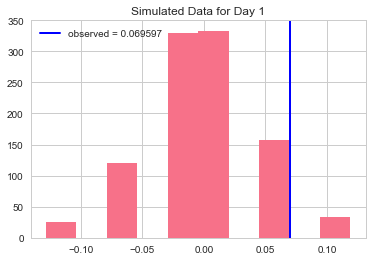

In [266]:
plt.hist(reps)

l = plt.axvline(obs,color='b', linewidth=2)
#ll = plt.axvline(-obs,color='b', linewidth=2)
plt.legend([l],['observed = {0:f}'.format(obs)], loc=2)

plt.title('Simulated Data for Day 1')


In [267]:
p = np.sum((reps) >= obs) / len(reps)
p

0.192

In [268]:
np.percentile(reps, [2.5, 97.5])

array([-0.07999084,  0.11904762])

In [269]:
df_overall_exp = pd.concat([t99,t51])
df_overall_exp['Overall_Exp_Rating'] = df_overall_exp['Overall_Experience'].map(rating)

In [270]:
#week 1

d99_week1 = df_99[df_99.Version_Duration=='1 weeks']['Overall_Exp_Rating']
d51_week1 = df_51[df_51.Version_Duration=='1 weeks']['Overall_Exp_Rating']


In [271]:
week1 = df_overall_exp[df_overall_exp.Version_Duration=='1 weeks']
pd.crosstab(index=week1['Overall_Exp_Rating'], columns=week1['Version'], margins=True)

Version,Version 51,Version 99,All
Overall_Exp_Rating,,,
High,34,25,59
Low,6,5,11
All,40,30,70


In [272]:
pd.crosstab(index=week1['Overall_Exp_Rating'], columns=week1['Version']).apply(lambda x: x/x.sum(), axis=0)

Version,Version 51,Version 99
Overall_Exp_Rating,,
High,0.85,0.833333
Low,0.15,0.166667


In [273]:
cohensH(0.83333,0.85)

h = 0.045678784619920254


In [274]:
w1 = get_verduration(df_overall_exp, '1 weeks')

In [275]:
get_crosstab(w1)

Version,Version 51,Version 99,All
Overall_Exp_Rating,,,
High,34,25,59
Low,6,5,11
All,40,30,70


In [276]:
permutation_sample(d99_week1, d51_week1)

(array(['High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
        'High', 'Low', 'High', 'High', 'High', 'High', 'High', 'High',
        'Low', 'Low', 'High', 'High', 'High', 'High', 'High', 'High',
        'High', 'High', 'High', 'High', 'High', 'High'], dtype=object),
 array(['High', 'High', 'High', 'High', 'High', 'Low', 'High', 'High',
        'High', 'High', 'High', 'Low', 'High', 'High', 'Low', 'High',
        'High', 'High', 'High', 'Low', 'High', 'High', 'Low', 'High',
        'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
        'High', 'High', 'High', 'High', 'High', 'Low', 'Low', 'Low'], dtype=object))

In [277]:
obs_week1 = prop_diff(d99_week1, d51_week1)
obs_week1

-0.016666666666666607

In [278]:
reps_week1 = draw_perm_reps(d99_week1, d51_week1, prop_diff, size=1000)

Text(0.5,1,'Simulated Data for Day week1')

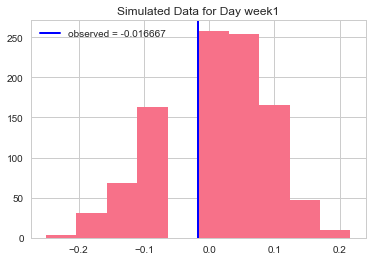

In [279]:
plt.hist(reps_week1)

l = plt.axvline(obs_week1,color='b', linewidth=2)
#ll = plt.axvline(-obs,color='b', linewidth=2)
plt.legend([l],['observed = {0:f}'.format(obs_week1)], loc=2)

plt.title('Simulated Data for Day week1')


In [280]:
np.sum((reps_week1) >= obs_week1) / len(reps_week1)

0.73399999999999999

In [281]:
#week 2

In [282]:
w2 = get_verduration(df_overall_exp, '2 weeks')
get_crosstab(w2)

Version,Version 51,Version 99,All
Overall_Exp_Rating,,,
High,29,18,47
Low,2,2,4
All,31,20,51


In [283]:
cohensH((18/20),(28/31))

h = 0.010831107774752269


In [284]:
d99_week2 = df_99[df_99.Version_Duration=='2 weeks']['Overall_Exp_Rating']
d51_week2 = df_51[df_51.Version_Duration=='2 weeks']['Overall_Exp_Rating']

In [285]:
permutation_sample(d99_week2, d51_week2)

(array(['High', 'High', 'Low', 'High', 'High', 'High', 'High', 'High',
        'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
        'High', 'High', 'High', 'Low'], dtype=object),
 array(['High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
        'Low', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
        'High', 'High', 'High', 'High', 'High', 'Low', 'High', 'High',
        'High', 'High', 'High', 'High', 'High', 'High', 'High'], dtype=object))

In [286]:
obs_week2 = prop_diff(d99_week2, d51_week2)
obs_week2


-0.03548387096774186

In [287]:
reps_week2 = draw_perm_reps(d99_week2, d51_week2, prop_diff, size=1000)

Text(0.5,1,'Simulated Data for Day week2')

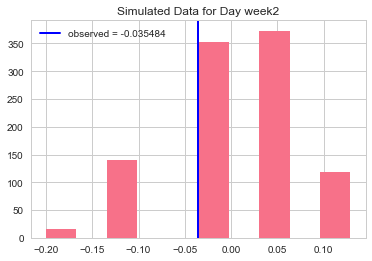

In [288]:
plt.hist(reps_week2)

l = plt.axvline(obs_week2,color='b', linewidth=2)
#ll = plt.axvline(-obs,color='b', linewidth=2)
plt.legend([l],['observed = {0:f}'.format(obs_week2)], loc=2)

plt.title('Simulated Data for Day week2')


In [289]:
np.sum((reps_week2) >= obs_week2) / len(reps_week2)

0.84399999999999997

In [290]:
#week 3

In [291]:
w3 = get_verduration(df_overall_exp, '3 weeks')
get_crosstab(w3)

Version,Version 51,Version 99,All
Overall_Exp_Rating,,,
High,19,11,30
Low,1,2,3
All,20,13,33


In [292]:
cohensH((11/13),(19/20))

h = 0.3550873371359633


In [293]:
d99_week3 = df_99[df_99.Version_Duration=='3 weeks']['Overall_Exp_Rating']
d51_week3 = df_51[df_51.Version_Duration=='3 weeks']['Overall_Exp_Rating']

In [294]:
obs_week3 = prop_diff(d99_week3, d51_week3)
obs_week3


-0.10384615384615381

In [295]:
reps_week3 = draw_perm_reps(d99_week3, d51_week3, prop_diff, size=1000)

Text(0.5,1,'Simulated Data for Day week3')

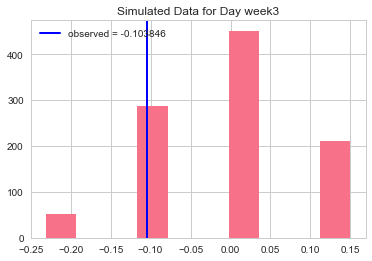

In [296]:
plt.hist(reps_week3)

l = plt.axvline(obs_week3,color='b', linewidth=2)
#ll = plt.axvline(-obs,color='b', linewidth=2)
plt.legend([l],['observed = {0:f}'.format(obs_week3)], loc=2)

plt.title('Simulated Data for Day week3')


In [297]:
np.sum((reps_week3) >= obs_week3) / len(reps_week3)

0.94899999999999995

In [298]:
#simulate all data without weekly restrictions

In [299]:
reps = draw_perm_reps(df_99['Overall_Exp_Rating'], df_51['Overall_Exp_Rating'], prop_diff, size=1000)

In [300]:
observed = prop_diff(df_99['Overall_Exp_Rating'], df_51['Overall_Exp_Rating'])
observed

-0.0002948547840188054

Text(0.5,1,'Simulated Data')

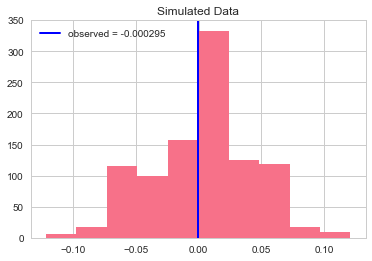

In [301]:
plt.hist(reps)

l = plt.axvline(observed,color='b', linewidth=2)
#ll = plt.axvline(-obs,color='b', linewidth=2)
plt.legend([l],['observed = {0:f}'.format(observed)], loc=2)

plt.title('Simulated Data')


In [302]:
np.sum((reps) >= observed) / len(reps)

0.60399999999999998

# Mann Whitney U test

$H_o$:The populations are Equal

$H_A$: The two populations are not equal

In [303]:
#changing the overall experience rating score into numeric number

exp_numeric_rating={'Excellent': 5, 'Good':4, 'No effect': 3, 'Not good': 4, 'Awful': 1}
df_99['Overall_Exp_Numeric'] = df_99['Overall_Experience'].map(exp_numeric_rating)

In [304]:
df_51['Overall_Exp_Numeric'] = df_51['Overall_Experience'].map(exp_numeric_rating)

In [305]:
stats.mannwhitneyu(df_99['Overall_Exp_Numeric'], df_51['Overall_Exp_Numeric'], alternative='two-sided')

MannwhitneyuResult(statistic=6175.0, pvalue=0.17457538531248362)

In [306]:
stats.ttest_ind(df_99['Overall_Exp_Numeric'].dropna(), df_51['Overall_Exp_Numeric'].dropna(), equal_var=False)

Ttest_indResult(statistic=-0.56357365136352078, pvalue=0.5735863071518823)

In [307]:
diff_means = df_99['Overall_Exp_Numeric'].mean() - df_51['Overall_Exp_Numeric'].mean()
diff_means

-0.05204186937933031

In [308]:
s1 = df_99['Overall_Exp_Numeric'].std()
s2 = df_51['Overall_Exp_Numeric'].std()

n1 = len(df_99['Overall_Exp_Numeric'])
n2 = len(df_51['Overall_Exp_Numeric'])

In [309]:
SEM  = np.sqrt(((s1**2)/n1) + ((s2**2)/n2))

In [310]:
diff_means - 1.96 * SEM,diff_means + 1.96 * SEM

(-0.23303341101138084, 0.12894967225272022)

In [311]:
twomeans(df_99, df_51, 'Overall_Exp_Numeric', 'Overall_Exp_Numeric')

Mean Difference = -0.05204186937933031
CI = (-0.23303341101138084, 0.12894967225272022)
SEM = 0.09234262328165843
Ttest_indResult(statistic=-0.54445718897259732, pvalue=0.58664757576870363)
MannwhitneyuResult(statistic=6175.0, pvalue=0.087287692656241811)


In [312]:
manntest(df_99['Overall_Exp_Numeric'], df_51['Overall_Exp_Numeric']) # converted to ordinal scale 


U = 6175.0
pval = 0.23915674737606363
Not Statistically Significant
UCRIT = 5770.111143482901


In [313]:
len(df_99['Overall_Exp_Numeric'].dropna())

102

In [314]:
len(df_51['Overall_Exp_Numeric'].dropna())

133

In [315]:
rankbis(6308.0,df_99['Overall_Exp_Numeric'].dropna(), df_51['Overall_Exp_Numeric'].dropna()) # converted to 
#close to one, so there is some overlap

Rank Biserial Correlation = 0.07002801120448177


In [316]:
(0.07002801120448177+1) /2 #common language effect

0.5350140056022409

In [317]:
6308/(133*102) #probabilistic effect size.

0.4649859943977591

In [318]:
cohensH((92/102), (120/133)) #cohen's h! less than 0.20

h = 0.0009922151297061532


Text(0.5,1,'Average Overall Experience Over Time')

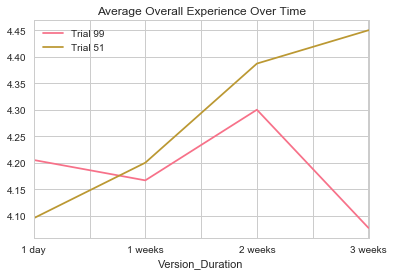

In [319]:
df_99.groupby(['Version_Duration'])['Overall_Exp_Numeric'].mean().plot()
df_51.groupby(['Version_Duration'])['Overall_Exp_Numeric'].mean().plot()
plt.legend(['Trial 99','Trial 51'])
plt.title('Average Overall Experience Over Time')

In [320]:
pd.crosstab(index=df_overall_exp.Overall_Exp_Rating, columns=df_overall_exp.Version, margins=True)

Version,Version 51,Version 99,All
Overall_Exp_Rating,,,
High,120,92,212
Low,13,10,23
All,133,102,235


In [321]:
cohensH(0.9019607843137255,0.9022556390977443 )

h = 0.0009922151297061532


In [322]:
logodds(92,10,120,13)

log odds ratio = -0.0033389012655145986


In [323]:
twoporZtest(92, 120, 102, 133)

z: -0.007539389277952073
p-value: 0.4969922473432886
CI: (-0.076961232978621716, 0.076371523410584105)
proportion difference: -0.0002948547840188054
p1: 0.9019607843137255
p2: 0.9022556390977443


In [324]:
cohensH(0.9019607843137255,0.9022556390977443)

h = 0.0009922151297061532


In [325]:
cont_table = pd.crosstab(index=df_overall_exp.Overall_Exp_Rating, columns=df_overall_exp.Version)
cont_table

Version,Version 51,Version 99
Overall_Exp_Rating,,
High,120,92
Low,13,10


In [326]:
stats.chi2_contingency(cont_table)

(0.04576611796223172,
 0.83060151197595922,
 1,
 array([[ 119.98297872,   92.01702128],
        [  13.01702128,    9.98297872]]))

In [327]:
stats.fisher_exact(cont_table) #if expected frequency is less than 5

(1.0033444816053512, 1.0)

In [328]:
numeric_map = {'Excellent': 5, 'Good': 4, 'No effect':3 ,'Not good':2, 'Awful':1}


# Sleep Quality

In [329]:
s99 = df_99[['Sleep_Quality','Overall_Exp_Rating', 'Version', 'Version_Duration']]
s51 = df_51[['Sleep_Quality','Overall_Exp_Rating', 'Version', 'Version_Duration']]
sleep_df = pd.concat([s99, s51])

In [330]:
sq = pd.crosstab(index=df_99.Overall_Exp_Rating, columns=df_99.Sleep_Quality, margins=True) # trial 99
sq

Sleep_Quality,Excellent,OK,Poor,All
Overall_Exp_Rating,,,,
High,46,40,4,90
Low,1,9,0,10
All,47,49,4,100


In [505]:
table = sm.stats.Table(sq)

In [506]:
print(table.table_orig)

Sleep_Quality       Excellent  OK  Poor  All
Overall_Exp_Rating                          
High                       46  40     4   90
Low                         1   9     0   10
All                        47  49     4  100


In [507]:
print(table.fittedvalues)

Sleep_Quality       Excellent         OK      Poor         All
Overall_Exp_Rating                                            
High                42.810345  44.603448  4.258621   90.327586
Low                  5.174877   5.391626  0.514778   10.918719
All                 47.514778  49.504926  4.726601  100.253695


In [508]:
print(table.resid_pearson)

Sleep_Quality       Excellent        OK      Poor       All
Overall_Exp_Rating                                         
High                 0.563912 -0.614419  0.116968  0.018141
Low                 -1.615447  1.769335 -0.020598 -0.126718
All                 -0.002144 -0.000700 -0.104229  0.024599


In [509]:
result = table.test_ordinal_association()
print (result.pvalue)

0.892530877743


In [510]:
print (result.statistic, result.null_mean, result.null_sd)

762.0 758.615763547 25.0494095381


In [511]:
logodds(46,1,44,9)

log odds ratio = 2.241676339907053


In [512]:
sq51 = pd.crosstab(index=df_51.Overall_Exp_Rating, columns=df_51.Sleep_Quality)
table = sm.stats.Table(sq51)

print (table.table_orig)

Sleep_Quality       Excellent  OK  Poor
Overall_Exp_Rating                     
High                       46  64     9
Low                         1   8     4


In [513]:
print (table.fittedvalues)

Sleep_Quality       Excellent         OK       Poor
Overall_Exp_Rating                                 
High                42.371212  64.909091  11.719697
Low                  4.628788   7.090909   1.280303


In [514]:
print (table.resid_pearson)

Sleep_Quality       Excellent        OK      Poor
Overall_Exp_Rating                               
High                 0.557476 -0.112838 -0.794442
Low                 -1.686662  0.341394  2.403611


In [515]:
result = table.test_ordinal_association()
print (result.pvalue)

0.00302629111994


In [516]:
print (result.statistic)

16.0


In [517]:
logodds(46,1,73,12)

log odds ratio = 2.023088605128704


In [340]:
pd.crosstab(index=sleep_df.Sleep_Quality, columns=sleep_df.Version, margins=True)

Version,Version 51,Version 99,All
Sleep_Quality,,,
Excellent,47,47,94
OK,72,49,121
Poor,13,4,17
All,132,100,232


In [520]:
logodds(47,53,47,85) #logodds between the two versions for excellent and non excellent

log odds ratio = 0.47235934293819454


In [341]:
#excellent between the two
twoporZtest(47, 47, 100, 132)

z: 1.7506583240065035
p-value: 0.04000239114295406
CI: (-0.013505537747437207, 0.241384325626225)
proportion difference: 0.1139393939393939
p1: 0.47
p2: 0.3560606060606061


In [342]:
cohensH((47/100), (47/132))

h = 0.23197506043912686


In [343]:
#ok

twoporZtest(49, 72, 100, 132)

z: -0.837363320547788
p-value: 0.20119418834113206
CI: (-0.18513023996920283, 0.074221149060111985)
proportion difference: -0.05545454545454542
p1: 0.49
p2: 0.5454545454545454


In [519]:
cohensH(0.49,0.5454545454545454)

h = 0.11103611161080584


In [344]:
#Poor
twoporZtest(4, 13, 100, 132)

z: -1.6928973943202785
p-value: 0.04523749970302936
CI: (-0.1221959457563685, 0.0052262487866715293)
proportion difference: -0.05848484848484848
p1: 0.04
p2: 0.09848484848484848


In [518]:
cohensH(0.04,0.09848484848484848)

h = 0.23571761980822387


In [345]:
def prop_diff_exl (data1, data2):
    """calculates the difference in proportions"""
    count_1 = len([values for values in data1 if values=='Excellent'])

    total_1 = len(data1)
    
    count_2 = len([values for values in data2 if values=='Excellent'])
    
    total_2 = len(data2)
    
    p1 = count_1 / total_1
    p2 = count_2 / total_2
    
    diff_prop = p1 - p2
    
    return diff_prop

In [346]:
exl = {'Excellent':'Excellent','OK': 'Not Excellent', 'Poor': 'Not Excellent'}
ss99 = s99['Sleep_Quality'].map(exl)
ss51 = s51['Sleep_Quality'].map(exl)
sleep_reps = draw_perm_reps(ss99, ss51, prop_diff_exl ,size=1000)

In [347]:
excellent = prop_diff_exl(ss99, ss51)
excellent

0.10740085507887365

Text(0.5,1,'Simulated Data for Sleep Quality For the Proportions of Excellent Raters')

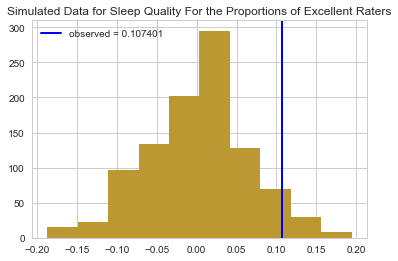

In [348]:
plt.hist(sleep_reps)


plt.hist(sleep_reps)

l = plt.axvline(excellent,color='b', linewidth=2)
#ll = plt.axvline(-obs,color='b', linewidth=2)
plt.legend([l],['observed = {0:f}'.format(excellent)], loc=2)

plt.title('Simulated Data for Sleep Quality For the Proportions of Excellent Raters')


In [349]:
np.sum((sleep_reps) >= excellent) / len(sleep_reps)

0.071999999999999995

In [350]:
sleep_rating = {'Excellent': 3, 'OK': 2, 'Poor': 1}
sleep_df['Sleep_Quality_Score'] = sleep_df['Sleep_Quality'].map(sleep_rating)

In [492]:
s = pd.crosstab(index=sleep_df.Version_Duration, columns=sleep_df.Version, values=sleep_df.Sleep_Quality_Score, aggfunc='mean')
s

Version,Version 51,Version 99
Version_Duration,,
1 day,2.170732,2.405405
1 weeks,2.275000,2.433333
2 weeks,2.322581,2.450000
3 weeks,2.300000,2.461538


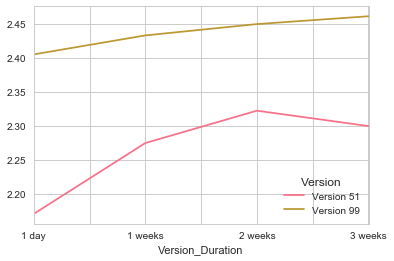

In [493]:
s.plot()

In [353]:
x = sleep_df[sleep_df.Version=='Version 99']['Sleep_Quality_Score'].dropna()
y = sleep_df[sleep_df.Version=='Version 51']['Sleep_Quality_Score'].dropna()

In [354]:
stats.ttest_ind(x,y, equal_var=False)

Ttest_indResult(statistic=2.1815022814071678, pvalue=0.030197167815845312)

In [355]:
stats.mannwhitneyu(x,y, alternative='two-sided')

MannwhitneyuResult(statistic=7526.5, pvalue=0.039754857558115302)

In [356]:
manntest(x,y)

U = 7526.5
pval = 0.06723731829991199
Not Statistically Significant
UCRIT = 5607.228827386384


In [497]:
rankbis(7526.5, x,y)

Rank Biserial Correlation = -0.14037878787878788
CLES = 0.42981060606060606


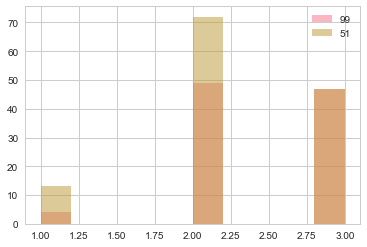

In [357]:
plt.hist(x, label='99', alpha=0.5)
plt.hist(y, label='51', alpha=0.5)
plt.legend()
plt.show()

## Focus Attention and Concentration

In [524]:
FAC99 = pd.crosstab(index=df_99.Overall_Exp_Rating, columns=df_99.Focus_Atten_Concen)
conttable(FAC99)

Original Table
Focus_Atten_Concen  Improved  Less good  No effect
Overall_Exp_Rating                                
High                      74          2         15
Low                        2          2          6
--------------
Fitted Values
Focus_Atten_Concen   Improved  Less good  No effect
Overall_Exp_Rating                                 
High                68.475248    3.60396  18.920792
Low                  7.524752    0.39604   2.079208
--------------
Pearon Residuals
Focus_Atten_Concen  Improved  Less good  No effect
Overall_Exp_Rating                                
High                0.667646  -0.844897  -0.901372
Low                -2.014034   2.548733   2.719098
--------------
pvalue = 0.00012154464459632272
statistic = 14.0


In [359]:
logodds(74,2,17,8) # combine less good and no effect together

log odds ratio = 2.8571461102678444


In [525]:
FAC51 = pd.crosstab(index=df_51.Overall_Exp_Rating, columns=df_51.Focus_Atten_Concen)
conttable(FAC51)

Original Table
Focus_Atten_Concen  Improved  Less good  No effect
Overall_Exp_Rating                                
High                     111          0          8
Low                        1          5          7
--------------
Fitted Values
Focus_Atten_Concen    Improved  Less good  No effect
Overall_Exp_Rating                                  
High                100.862963   5.355556  14.281481
Low                  12.137037   0.644444   1.718519
--------------
Pearon Residuals
Focus_Atten_Concen  Improved  Less good  No effect
Overall_Exp_Rating                                
High                1.059144  -2.098151  -1.529863
Low                -3.053264   6.048479   4.410238
--------------
pvalue = 6.877911093829427e-12
statistic = 20.5


In [361]:
logodds(111,1, 8, 12)

log odds ratio = 5.1149953094204985


In [362]:
f99 = df_99[['Focus_Atten_Concen','Overall_Exp_Rating', 'Version', 'Version_Duration']]
f51 = df_51[['Focus_Atten_Concen','Overall_Exp_Rating', 'Version', 'Version_Duration']]
f_df = pd.concat([f99, f51])

In [363]:
pd.crosstab(index=f_df.Focus_Atten_Concen, columns=f_df.Version, margins=True)

Version,Version 51,Version 99,All
Focus_Atten_Concen,,,
Improved,112,76,188
Less good,5,4,9
No effect,15,21,36
All,132,101,233


In [536]:
 logodds(76,25,112,20) #combined less and no effect together

log odds ratio = -0.6109090823229731


In [530]:
#improved
twoporZtest(76, 112, 101, 132)

z: -1.8397342607448173
p-value: 0.03290363050050351
CI: (-0.20005676678369366, 0.0080375648635015867)
proportion difference: -0.09600960096009603
p1: 0.7524752475247525
p2: 0.8484848484848485
Cohens H = 0.241838388468532


In [365]:
cohensH((76/101), (112/132))

h = 0.241838388468532


In [531]:
#less good
twoporZtest(4, 5, 101, 132)

z: 0.06771936547468269
p-value: 0.47300451663924803
CI: (-0.048348120008156407, 0.051798465042659857)
proportion difference: 0.0017251725172517246
p1: 0.039603960396039604
p2: 0.03787878787878788
Cohens H = 0.00894028026166116


In [532]:
#no effect
twoporZtest(21, 15, 101, 132)

z: 1.973245959687659
p-value: 0.024233773261684487
CI: (-0.0016083696115250928, 0.19017722649721364)
proportion difference: 0.09428442844284428
p1: 0.2079207920792079
p2: 0.11363636363636363
Cohens H = 0.2592838983315384


In [368]:
rating_3 = {'Improved':3, 'Less good':2, 'No effect':1}

In [369]:
f_df['FAC_Rating'] = f_df['Focus_Atten_Concen'].map(rating_3)

f_df99 = f_df[f_df.Version=='Version 99']['FAC_Rating'].dropna()
f_df51 = f_df[f_df.Version=='Version 51']['FAC_Rating'].dropna()


In [370]:
stats.mannwhitneyu(f_df99, f_df51, alternative='two-sided')

MannwhitneyuResult(statistic=6003.5, pvalue=0.058503882463414224)

In [371]:
stats.mannwhitneyu(f_df99, f_df51, alternative='two-sided', use_continuity=False)

MannwhitneyuResult(statistic=6003.5, pvalue=0.058313718015346579)

In [372]:
manntest(f_df99, f_df51)

U = 6003.5
pval = 0.1938292062240934
Not Statistically Significant
UCRIT = 5666.14214697637


In [535]:
rankbis(6003.5, f_df99, f_df51)

Rank Biserial Correlation = 0.09938493849384944
CLES = 0.5496924692469247


In [373]:
pd.crosstab(index=f_df.Version_Duration, columns=f_df.Version, values=f_df.FAC_Rating, aggfunc=np.mean)

Version,Version 51,Version 99
Version_Duration,,
1 day,2.658537,2.526316
1 weeks,2.725000,2.533333
2 weeks,2.870968,2.600000
3 weeks,2.700000,2.538462


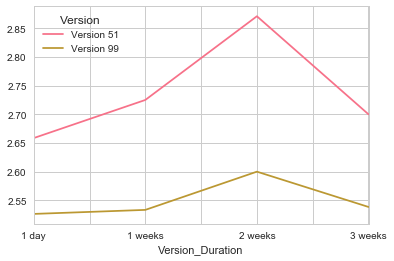

In [374]:
pd.crosstab(index=f_df.Version_Duration, columns=f_df.Version, values=f_df.FAC_Rating, aggfunc=np.mean).plot()

In [375]:
stats.ttest_ind(f_df[f_df.Version=='Version 99']['FAC_Rating'].dropna(), f_df[f_df.Version=='Version 51']['FAC_Rating'].dropna(), equal_var=False)

Ttest_indResult(statistic=-1.916320121376307, pvalue=0.056849328234860476)

In [376]:
f_df.groupby(['Version'])['FAC_Rating'].std()

Version
Version 51    0.652182
Version 99    0.818838
Name: FAC_Rating, dtype: float64

In [377]:
f_df.groupby(['Version'])['FAC_Rating'].median()

Version
Version 51    3.0
Version 99    3.0
Name: FAC_Rating, dtype: float64

## Memory

In [537]:
MEM99 = pd.crosstab(index=df_99.Overall_Exp_Rating, columns=df_99.Memory)
conttable(MEM99)

Original Table
Memory              Improved  Less good  No effect
Overall_Exp_Rating                                
High                      29          2         60
Low                        1          0          9
--------------
Fitted Values
Memory               Improved  Less good  No effect
Overall_Exp_Rating                                 
High                27.572115   2.668269  62.259615
Low                  3.427885   0.331731   7.740385
--------------
Pearon Residuals
Memory              Improved  Less good  No effect
Overall_Exp_Rating                                
High                0.367152  -0.103012  -0.223005
Low                -1.041281   0.292154   0.632465
--------------
pvalue = 0.2080012607588264
statistic = 19.5


In [379]:
logodds(29, 1, 62, 9)

log odds ratio = 1.4373860222776018


In [538]:
MEM51 = pd.crosstab(index=df_51.Overall_Exp_Rating, columns=df_51.Memory)
conttable(MEM51)

Original Table
Memory              Improved  Less good  No effect
Overall_Exp_Rating                                
High                      73          1         45
Low                        1          2         10
--------------
Fitted Values
Memory               Improved  Less good  No effect
Overall_Exp_Rating                                 
High                66.712121   2.704545  49.583333
Low                  7.287879   0.295455   5.416667
--------------
Pearon Residuals
Memory              Improved  Less good  No effect
Overall_Exp_Rating                                
High                0.769842  -1.036481  -0.650899
Low                -2.329183   3.135908   1.969316
--------------
pvalue = 0.0012183520438823947
statistic = 22.0


In [381]:
logodds (73, 1, 46, 12)

log odds ratio = 2.9467246944472962


In [382]:
m99 = df_99[['Memory','Overall_Exp_Rating', 'Version', 'Version_Duration']]
m51 = df_51[['Memory','Overall_Exp_Rating', 'Version', 'Version_Duration']]
m_df = pd.concat([m99, m51])

In [383]:
pd.crosstab(index=m_df.Memory, columns=m_df.Version, margins=True)

Version,Version 51,Version 99,All
Memory,,,
Improved,74,30,104
Less good,3,2,5
No effect,55,69,124
All,132,101,233


In [546]:
logodds(99,71,74,58)

log odds ratio = 0.08881789043552389


In [539]:
#improved
twoporZtest(30, 101, 74, 132)

z: -5.148328644106801
p-value: 1.3140886172733486e-07
CI: (-0.49295087194869325, -0.2265413475435262)
proportion difference: -0.3597461097461097
p1: 0.40540540540540543
p2: 0.7651515151515151
Cohens H = 0.7492943112346768


In [540]:
#less good
twoporZtest(2, 101, 3, 132)

z: -0.39663432606659044
p-value: 0.34581856796867205
CI: (-0.63680874959462863, 0.43983905262493161)
proportion difference: -0.09848484848484851
p1: 0.6666666666666666
p2: 0.7651515151515151
Cohens H = 0.21912104386015474


In [542]:
#no effect
twoporZtest(69, 55, 101, 132) # significant 

z: 4.040186600596896
p-value: 2.670434533358601e-05
CI: (0.14278243501003396, 0.39022086531999911)
proportion difference: 0.26650165016501653
p1: 0.6831683168316832
p2: 0.4166666666666667
Cohens H = 0.5425169722035501


In [387]:
m_df['Memory_Rating'] = m_df['Memory'].map(rating_3)


In [388]:
m_df99 = m_df[m_df.Version=='Version 99']['Memory_Rating'].dropna()
m_df51 = m_df[m_df.Version=='Version 51']['Memory_Rating'].dropna()

In [545]:
manntest(m_df99, m_df51)

U = 4860.5
pval = 0.0003985321899022679
Rank Biserial Correlation = 0.2708520852085209
CLES = 0.6354260426042604
Statistically Significant
UCRIT = 5666.14214697637


Text(0.5,1,'Comparison of Memory over Time')

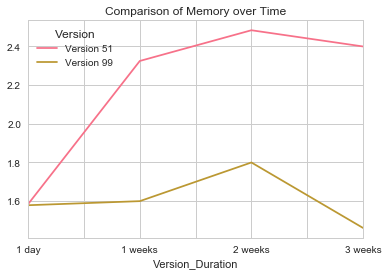

In [390]:
pd.crosstab(index=m_df.Version_Duration, columns=m_df.Version, values=m_df.Memory_Rating, aggfunc=np.mean).plot()
plt.title('Comparison of Memory over Time')

In [391]:
stats.ttest_ind(m_df99, m_df51, equal_var=False)

Ttest_indResult(statistic=-4.2422683179857499, pvalue=3.2494071858880809e-05)

In [392]:
m_df99.std(), m_df51.std()

(0.9161909956957992, 0.9817617421942415)

In [393]:
m_df99.mean(), m_df51.mean()

(1.613861386138614, 2.143939393939394)

In [394]:
m_df99.median(), m_df51.median()

(1.0, 3.0)

## Drive, Passion and Motivation

In [547]:
DAM99 = pd.crosstab(index=df_99.Overall_Exp_Rating, columns =df_99.Drive_Passion_Motivation)
conttable(DAM99)

Original Table
Drive_Passion_Motivation  Improved  Less good  No effect
Overall_Exp_Rating                                      
High                            68          2         21
Low                              0          3          7
--------------
Fitted Values
Drive_Passion_Motivation   Improved  Less good  No effect
Overall_Exp_Rating                                       
High                      61.370192   5.336538  25.793269
Low                        7.629808   0.663462   3.206731
--------------
Pearon Residuals
Drive_Passion_Motivation  Improved  Less good  No effect
Overall_Exp_Rating                                      
High                      0.910121  -1.227888  -0.845347
Low                      -2.581196   3.482417   2.397490
--------------
pvalue = 6.65991952248062e-05
statistic = 18.5


In [548]:
DAM51 = pd.crosstab(index=df_51.Overall_Exp_Rating, columns =df_51.Drive_Passion_Motivation)
conttable(DAM51)

Original Table
Drive_Passion_Motivation  Improved  Less good  No effect
Overall_Exp_Rating                                      
High                           100          0         19
Low                              0          5          8
--------------
Fitted Values
Drive_Passion_Motivation   Improved  Less good  No effect
Overall_Exp_Rating                                       
High                      90.151852   5.355556  24.992593
Low                       10.848148   0.644444   3.007407
--------------
Pearon Residuals
Drive_Passion_Motivation  Improved  Less good  No effect
Overall_Exp_Rating                                      
High                      1.089872  -2.098151  -1.098681
Low                      -3.141846   6.048479   3.167242
--------------
pvalue = 7.166390498238819e-08
statistic = 22.5


In [397]:
dam99 = df_99[['Drive_Passion_Motivation','Overall_Exp_Rating', 'Version', 'Version_Duration']]
dam51 = df_51[['Drive_Passion_Motivation','Overall_Exp_Rating', 'Version', 'Version_Duration']]
DAM_df = pd.concat([dam99, dam51])

In [398]:
pd.crosstab(index=DAM_df.Drive_Passion_Motivation, columns=DAM_df.Version, margins=True)

Version,Version 51,Version 99,All
Drive_Passion_Motivation,,,
Improved,100,68,168
Less good,5,5,10
No effect,27,28,55
All,132,101,233


In [552]:
logodds(68,65,100,32)

log odds ratio = -1.0943138479078953


In [549]:
#improved
twoporZtest(68, 100, 101, 132)

z: -1.4219531906523224
p-value: 0.07751992012207995
CI: (-0.20140638315018378, 0.032789521464015259)
proportion difference: -0.08430843084308426
p1: 0.6732673267326733
p2: 0.7575757575757576
Cohens H = 0.1873100985470122


In [400]:
cohensH(0.673267326733,0.757575757576)

h = 0.18731009854688097


In [550]:
#less good
twoporZtest(5, 5, 101, 132)

z: 0.433919906894386
p-value: 0.33217330168871045
CI: (-0.041762671259978332, 0.065014996492501587)
proportion difference: 0.011626162616261627
p1: 0.04950495049504951
p2: 0.03787878787878788
Cohens H = 0.05700030352119412


In [551]:
#no effect
twoporZtest(28, 27, 101, 132)

z: 1.2946808944020367
p-value: 0.09771516671159058
CI: (-0.03847776466508615, 0.18384230111873154)
proportion difference: 0.0726822682268227
p1: 0.27722772277227725
p2: 0.20454545454545456
Cohens H = 0.170402815657672


In [403]:
DAM_df['DAM_Rating'] = DAM_df['Drive_Passion_Motivation'].map(rating_3)

In [404]:
dm99 = DAM_df[DAM_df.Version=='Version 99']['DAM_Rating'].dropna()
dm51 = DAM_df[DAM_df.Version=='Version 51']['DAM_Rating'].dropna()


In [553]:
manntest(dm99, dm51)


U = 6101.5
pval = 0.2682373199591319
Rank Biserial Correlation = 0.08468346834683471
CLES = 0.5423417341734174
Not Statistically Significant
UCRIT = 5666.14214697637


In [406]:
pd.crosstab(index=DAM_df.Version_Duration, columns=DAM_df.Version, values=DAM_df.DAM_Rating, aggfunc=np.mean)

Version,Version 51,Version 99
Version_Duration,,
1 day,2.439024,2.394737
1 weeks,2.600000,2.300000
2 weeks,2.612903,2.550000
3 weeks,2.600000,2.384615


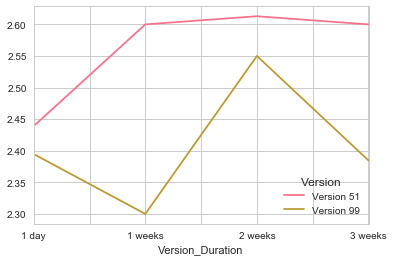

In [407]:
pd.crosstab(index=DAM_df.Version_Duration, columns=DAM_df.Version, values=DAM_df.DAM_Rating, aggfunc=np.mean).plot()

In [408]:
stats.ttest_ind(dm99, dm51, equal_var=False)

Ttest_indResult(statistic=-1.379755495256465, pvalue=0.16917210084612946)

In [409]:
DAM_df.groupby(['Version'])['DAM_Rating'].std()

Version
Version 51    0.813196
Version 99    0.895312
Name: DAM_Rating, dtype: float64

In [410]:
DAM_df.groupby(['Version'])['DAM_Rating'].mean()

Version
Version 51    2.55303
Version 99    2.39604
Name: DAM_Rating, dtype: float64

## Physical Energy

In [554]:
PE99 = pd.crosstab(index=df_99.Overall_Exp_Rating, columns=df_99.Physical_Energy)
conttable(PE99)

Original Table
Physical_Energy     Improved  Less good  No effect
Overall_Exp_Rating                                
High                      69          0         22
Low                        0          7          3
--------------
Fitted Values
Physical_Energy      Improved  Less good  No effect
Overall_Exp_Rating                                 
High                62.259615   7.115385     23.125
Low                  7.740385   0.884615      2.875
--------------
Pearon Residuals
Physical_Energy     Improved  Less good  No effect
Overall_Exp_Rating                                
High                0.917611  -2.480024  -0.129969
Low                -2.602438   7.033603   0.368605
--------------
pvalue = 0.00454941523852239
statistic = 14.5


In [555]:
PE51 = pd.crosstab(index=df_51.Overall_Exp_Rating, columns=df_51.Physical_Energy)
conttable(PE51)

Original Table
Physical_Energy     Improved  Less good  No effect
Overall_Exp_Rating                                
High                      89          2         28
Low                        1          6          6
--------------
Fitted Values
Physical_Energy      Improved  Less good  No effect
Overall_Exp_Rating                                 
High                81.136364   7.212121  30.651515
Low                  8.863636   0.787879   3.348485
--------------
Pearon Residuals
Physical_Energy     Improved  Less good  No effect
Overall_Exp_Rating                                
High                0.873003  -1.940810  -0.478926
Low                -2.641298   5.871983   1.449005
--------------
pvalue = 0.0004459307006580982
statistic = 18.0


In [413]:
logodds(89, 1, 30, 12)

log odds ratio = 3.572345637857985


In [414]:
PE99 = df_99[['Physical_Energy','Overall_Exp_Rating', 'Version', 'Version_Duration']]
PE51 = df_51[['Physical_Energy','Overall_Exp_Rating', 'Version', 'Version_Duration']]
PE_df = pd.concat([PE99, PE51])

In [415]:
pd.crosstab(index=PE_df.Physical_Energy, columns=PE_df.Version, margins=True)

Version,Version 51,Version 99,All
Physical_Energy,,,
Improved,90,69,159
Less good,8,7,15
No effect,34,25,59
All,132,101,233


In [556]:
logodds(69,32,90,42)

log odds ratio = 0.006230549750636163


In [557]:
#improved
twoporZtest(69, 90, 101, 132)

z: 0.02193756350935466
p-value: 0.49124888031524233
CI: (-0.11925859157495103, 0.12195886160195393)
proportion difference: 0.0013501350135014523
p1: 0.6831683168316832
p2: 0.6818181818181818
Cohens H = 0.0029003590235348042


In [558]:
#less good
twoporZtest(7, 8, 101, 132)

z: 0.2681726113030757
p-value: 0.3942832280491163
CI: (-0.05541116631266986, 0.072812906486687271)
proportion difference: 0.008700870087008705
p1: 0.06930693069306931
p2: 0.06060606060606061
Cohens H = 0.03532395205073602


In [559]:
#no effect
twoporZtest(25,34, 101, 132)

z: -0.17483745512560744
p-value: 0.4306036783321098
CI: (-0.12252217012598454, 0.10242015992496445)
proportion difference: -0.010051005100510046
p1: 0.24752475247524752
p2: 0.25757575757575757
Cohens H = 0.023134690799326396


In [419]:
PE_df['PE_Rating'] = PE_df['Physical_Energy'].map(rating_3)

In [420]:
pe99 = PE_df[PE_df.Version=='Version 99']['PE_Rating'].dropna()
pe51 = PE_df[PE_df.Version=='Version 51']['PE_Rating'].dropna()

In [560]:
manntest(pe99, pe51)

U = 6694.0
pval = 0.9562059715780701
Rank Biserial Correlation = -0.0042004200420042714
CLES = 0.49789978997899786
Not Statistically Significant
UCRIT = 5666.14214697637


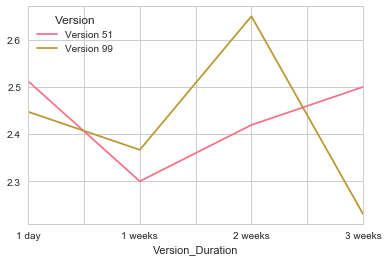

In [422]:
pd.crosstab(index=PE_df.Version_Duration, columns=PE_df.Version, values=PE_df.PE_Rating, aggfunc=np.mean).plot()

In [423]:
def STATtest (df1, df2, col):
    """automates finding the statistical tests but does not do cliffsdelta, cohensH, or twoproportion ztest"""
    table99 = pd.crosstab(index=df1.Overall_Exp_Rating, columns=df1[col])
    table51 = pd.crosstab(index=df2.Overall_Exp_Rating, columns=df2[col])
    
    print ('--------------------Trial 99----------------------')
    print (conttable(table99))
    print ('                                          ')
    print ('                                          ')

    print ('--------------------Trial 51----------------------')
    print (conttable(table51))
    
    
    df99 = df1[[col,'Overall_Exp_Rating', 'Version', 'Version_Duration']]
    df51 = df2[[col,'Overall_Exp_Rating', 'Version', 'Version_Duration']]
    df = pd.concat([df99, df51])
    tab = pd.crosstab(index=df[col], columns=df.Version, margins=True)
    print ('                                          ')
    print ('                                          ')
    print (tab)
    
    df['Rating'] = df[col].map(rating_3)
    
    t99 = df[df.Version=='Version 99']['Rating'].dropna()
    t51 = df[df.Version=='Version 51']['Rating'].dropna()
    
    print ('                                          ')
    print ('                                          ')
    
    print (manntest(t99,t51))
    
    mean_OT = pd.crosstab(index=df.Version_Duration, columns=df.Version, values=df.Rating, aggfunc=np.mean)
    mean_OT.plot()
    plt.title(str(col)+ ' ' + 'Over Time')
    print (stats.ttest_ind(t99, t51, equal_var=False))

# Capacity for Productivity


--------------------Trial 99----------------------
Original Table
Capacity_Productivity  Improved  Less good  No effect
Overall_Exp_Rating                                   
High                         63          0         28
Low                           0          2          8
--------------
Fitted Values
Capacity_Productivity   Improved  Less good  No effect
Overall_Exp_Rating                                    
High                   56.923077   2.668269  32.908654
Low                     7.076923   0.331731   4.091346
--------------
Pearon Residuals
Capacity_Productivity  Improved  Less good  No effect
Overall_Exp_Rating                                   
High                   0.871723  -1.327390  -0.768513
Low                   -2.472296   3.764613   2.179580
--------------
pvalue = 0.0003233846395441866
statistic = 19.5
None
                                          
                                          
--------------------Trial 51----------------------
Original Table
C

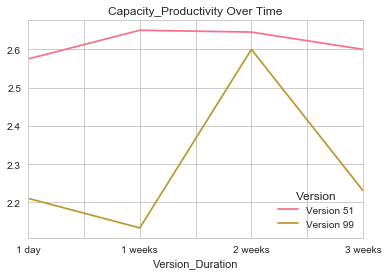

In [561]:
STATtest(df_99,df_51,'Capacity_Productivity')

In [425]:
logodds(102, 1, 16, 12) #only for trial 51 is viable

log odds ratio = 4.33729074083249


In [562]:
logodds(63,38,103,28)

log odds ratio = -0.7969759113892848


In [563]:
#improved
twoporZtest(63, 103, 101, 131)

z: -2.719944897259361
p-value: 0.0032646397842822205
CI: (-0.28020261600223278, -0.044791715491985282)
proportion difference: -0.16249716574710904
p1: 0.6237623762376238
p2: 0.7862595419847328
Cohens H = 0.35945036085658866


In [427]:
cohensH(0.623762376238, 0.786259541985)

h = 0.35945036085646365


In [564]:
#less good
twoporZtest(22, 36, 101, 131)

z: -0.9938718332210543
p-value: 0.16014263439454418
CI: (-0.16800328008751136, 0.05402852383325997)
proportion difference: -0.056987378127125704
p1: 0.21782178217821782
p2: 0.2748091603053435
Cohens H = 0.13246068567355862


In [565]:
#no effect
twoporZtest(2, 6, 101, 131)

z: -1.0760615109519795
p-value: 0.1409498738439498
CI: (-0.07094270285664879, 0.018943609817573887)
proportion difference: -0.02599954651953745
p1: 0.019801980198019802
p2: 0.04580152671755725
Cohens H = 0.1489862004590029


## Decisiveness

--------------------Trial 99----------------------
Original Table
Decisiveness        Improved  Less good  No effect
Overall_Exp_Rating                                
High                      55          0         36
Low                        1          1          8
--------------
Fitted Values
Decisiveness         Improved  Less good  No effect
Overall_Exp_Rating                                 
High                50.697115   1.778846  40.024038
Low                  6.302885   0.221154   4.975962
--------------
Pearon Residuals
Decisiveness        Improved  Less good  No effect
Overall_Exp_Rating                                
High                0.674544  -0.958847  -0.557032
Low                -1.913077   2.719387   1.579800
--------------
pvalue = 0.008430701062821568
statistic = 18.5
None
                                          
                                          
--------------------Trial 51----------------------
Original Table
Decisiveness        Improved  Less goo

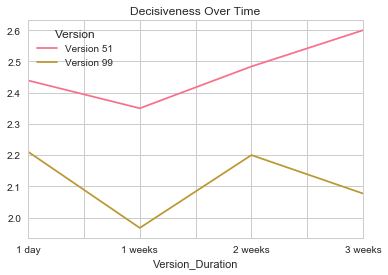

In [566]:
STATtest(df_99, df_51, 'Decisiveness')

In [570]:
logodds(56,45,94,40) #overall

log odds ratio = -0.6357261271912381


In [571]:
logodds(55,1,36,9) #trial 99

log odds ratio = 2.6210388241125804


In [572]:
logodds(93,1,26,12)

log odds ratio = 3.7594096049197745


In [567]:
#improved 
twoporZtest(56, 94, 101, 132)

z: -2.490452964931643
p-value: 0.006379019061133564
CI: (-0.28161081487546041, -0.033720718277854889)
proportion difference: -0.15766576657665765
p1: 0.5544554455445545
p2: 0.7121212121212122
Cohens H = 0.32899777062396063


In [432]:
cohensH(0.554455445545,0.712121212121)

h = 0.32899777062259594


In [568]:
#less good|
twoporZtest(1, 3, 101, 132)

z: -0.7469278993675201
p-value: 0.2275535420122961
CI: (-0.04475216337007213, 0.01909959811354648)
proportion difference: -0.012826282628262827
p1: 0.009900990099009901
p2: 0.022727272727272728
Cohens H = 0.10332796897210744


In [569]:
#no effect
twoporZtest(44, 35, 101, 132)

z: 2.7243056913397066
p-value: 0.003221841717406967
CI: (0.047927815917733527, 0.29305628249210747)
proportion difference: 0.1704920492049205
p1: 0.43564356435643564
p2: 0.26515151515151514
Cohens H = 0.3598765519900462


In [435]:
df_99.columns

Index(['Start_Date', 'End_Date', 'Last_Name', 'Version_Duration',
       'Sleep_Quality', 'Overall_Experience', 'Focus_Atten_Concen', 'Memory',
       'Drive_Passion_Motivation', 'Physical_Energy', 'Capacity_Productivity',
       'Decisiveness', 'Verbal_Fluency_Word_Recall', 'Creativity_Insight',
       'InterpersonalCapability_Empathy', 'Emotional_Stability',
       'Euphoria_Joy_Happiness', 'Estimated_Effect_Duration',
       'Upper_Effect_Duration', 'Lower_Effect_Duration',
       'Current_User_Comparison', 'User_Status', 'Version',
       'Overall_Exp_Rating', 'Overall_Exp_Numeric'],
      dtype='object')

## Verbal Fluency Word Recall

--------------------Trial 99----------------------
Original Table
Verbal_Fluency_Word_Recall  Improved  Less good  No effect
Overall_Exp_Rating                                        
High                              32          6         53
Low                                2          0          7
--------------
Fitted Values
Verbal_Fluency_Word_Recall   Improved  Less good  No effect
Overall_Exp_Rating                                         
High                        31.432039   6.286408  54.781553
Low                          3.567961   0.713592   6.218447
--------------
Pearon Residuals
Verbal_Fluency_Word_Recall  Improved  Less good  No effect
Overall_Exp_Rating                                        
High                        0.190489   0.085189  -0.173149
Low                        -0.565386  -0.252849   0.513920
--------------
pvalue = 0.41387369032306986
statistic = 15.5
None
                                          
                                          
---------

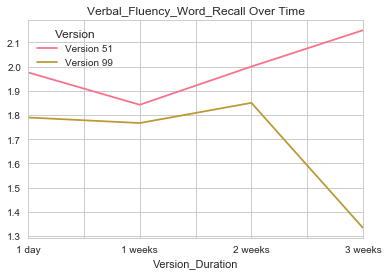

In [573]:
STATtest(df_99, df_51, 'Verbal_Fluency_Word_Recall')

In [437]:
logodds(32, 2, 59, 7) # trial 99


log odds ratio = 0.6409614273893751


In [576]:
logodds(34,66,59,70) #in general

log odds ratio = -0.49233641926662464


In [577]:
#improved
twoporZtest(34,59, 100, 129)

z: -1.7936505404486083
p-value: 0.036434482130218784
CI: (-0.24390041442278676, 0.0091717322522442135)
proportion difference: -0.11736434108527127
p1: 0.34
p2: 0.4573643410852713
Cohens H = 0.24035449243612783


In [578]:
cohensH(0.34,0.457364341085 )

0.24035449243558338

In [579]:
#less good
twoporZtest(6,7, 100, 129)

z: 0.1860613012849853
p-value: 0.42619834452333377
CI: (-0.055049544504304875, 0.066522412721359142)
proportion difference: 0.00573643410852713
p1: 0.06
p2: 0.05426356589147287
Cohens H = 0.0247234769986312


In [580]:
#no effect
twoporZtest(60, 63, 100, 129)

z: 1.680273158309565
p-value: 0.0464520905002362
CI: (-0.017448716625135557, 0.24070453057862393)
proportion difference: 0.11162790697674418
p1: 0.6
p2: 0.4883720930232558
Cohens H = 0.22461583150564124


In [442]:
df_99.columns

Index(['Start_Date', 'End_Date', 'Last_Name', 'Version_Duration',
       'Sleep_Quality', 'Overall_Experience', 'Focus_Atten_Concen', 'Memory',
       'Drive_Passion_Motivation', 'Physical_Energy', 'Capacity_Productivity',
       'Decisiveness', 'Verbal_Fluency_Word_Recall', 'Creativity_Insight',
       'InterpersonalCapability_Empathy', 'Emotional_Stability',
       'Euphoria_Joy_Happiness', 'Estimated_Effect_Duration',
       'Upper_Effect_Duration', 'Lower_Effect_Duration',
       'Current_User_Comparison', 'User_Status', 'Version',
       'Overall_Exp_Rating', 'Overall_Exp_Numeric'],
      dtype='object')

## Creativity Insight

--------------------Trial 99----------------------
Original Table
Creativity_Insight  Improved  No effect
Overall_Exp_Rating                     
High                      50         41
Low                        1          9
--------------
Fitted Values
Creativity_Insight   Improved  No effect
Overall_Exp_Rating                      
High                45.950495  45.049505
Low                  5.049505   4.950495
--------------
Pearon Residuals
Creativity_Insight  Improved  No effect
Overall_Exp_Rating                     
High                0.597388  -0.603333
Low                -1.802094   1.820026
--------------
pvalue = 0.00725455965226939
statistic = 9.0
None
                                          
                                          
--------------------Trial 51----------------------
Original Table
Creativity_Insight  Improved  Less good  No effect
Overall_Exp_Rating                                
High                      71          0         47
Low                

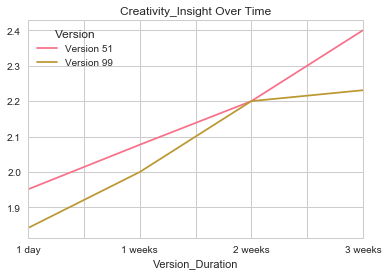

In [581]:
STATtest(df_99, df_51, 'Creativity_Insight')

In [582]:
logodds(50,1,41,9) #trial 99

log odds ratio = 2.3956755160600576


In [583]:
logodds(51,50,71,59)

log odds ratio = -0.1653398058394162


In [584]:
#improved
twoporZtest(51, 71, 101, 130)

z: -0.6222683720233742
p-value: 0.2668827072596184
CI: (-0.17094433406594478, 0.088537631857262489)
proportion difference: -0.041203351104341146
p1: 0.504950495049505
p2: 0.5461538461538461
Cohens H = 0.08253813348043137


In [585]:
cohensH(0.50495049505,0.546153846154)

0.082538133479750586

In [586]:
#less good
twoporZtest(0, 3, 101, 130)

z: -1.5366968624174264
p-value: 0.06218377991237078
CI: (-0.048887845810570402, 0.0027339996567242453)
proportion difference: -0.023076923076923078
p1: 0.0
p2: 0.023076923076923078
Cohens H = 0.3050026597947112


In [587]:
#no effect
twoporZtest(50, 56, 101, 130)

z: 0.9725414818907152
p-value: 0.16539061928753312
CI: (-0.065157112920155774, 0.19371766128268428)
proportion difference: 0.06428027418126425
p1: 0.49504950495049505
p2: 0.4307692307692308
Cohens H = 0.1290066690744649


# Interpersonal Capability and Empathy

--------------------Trial 99----------------------
Original Table
InterpersonalCapability_Empathy  Improved  Less good  No effect
Overall_Exp_Rating                                             
High                                   40          1         49
Low                                     1          1          8
--------------
Fitted Values
InterpersonalCapability_Empathy  Improved  Less good  No effect
Overall_Exp_Rating                                             
High                                 36.9        1.8       51.3
Low                                   4.1        0.2        5.7
--------------
Pearon Residuals
InterpersonalCapability_Empathy  Improved  Less good  No effect
Overall_Exp_Rating                                             
High                             0.510327  -0.596285  -0.321121
Low                             -1.530981   1.788854   0.963364
--------------
pvalue = 0.06676339758620556
statistic = 17.0
None
                                       

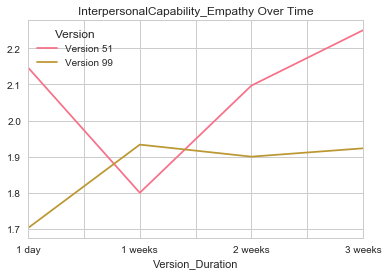

In [588]:
STATtest(df_99, df_51, 'InterpersonalCapability_Empathy')

In [449]:
#trial 99 
logodds(40, 1, 50, 9)

log odds ratio = 1.9740810260220096


In [450]:
logodds(63, 1, 56, 12) # trial 51

log odds ratio = 2.6026896854443837


In [589]:
logodds(41,59,64,68)

log odds ratio = -0.3033407553849767


In [590]:
#improved
twoporZtest(41, 64, 100, 132)

z: -1.1342726528136473
p-value: 0.12834009835399646
CI: (-0.20354155707587548, 0.053844587378905712)
proportion difference: -0.07484848484848489
p1: 0.41
p2: 0.48484848484848486
Cohens H = 0.15067878128036094


In [591]:
cohensH(0.41,0.484848484848 )

0.15067878127939061

In [592]:
#less good
twoporZtest(2, 10, 100, 132) #significant 

z: -1.899034600806338
p-value: 0.02877996339232921
CI: (-0.10858465415612792, -0.0029304973590235858)
proportion difference: -0.055757575757575756
p1: 0.02
p2: 0.07575757575757576
Cohens H = 0.27388652053107143


In [593]:
#no effect
twoporZtest(57, 58, 100, 132) # significant

z: 1.970391100442233
p-value: 0.02439678237507343
CI: (0.0018247692907987223, 0.2593873519213224)
proportion difference: 0.13060606060606056
p1: 0.57
p2: 0.4393939393939394
Cohens H = 0.26197233139953613


In [594]:
cohensH(0.57, 0.439393939394)

0.261972331399414

## Emotional Stability

--------------------Trial 99----------------------
Original Table
Emotional_Stability  Improved  Less good  No effect
Overall_Exp_Rating                                 
High                       51          6         34
Low                         0          4          6
--------------
Fitted Values
Emotional_Stability  Improved  Less good  No effect
Overall_Exp_Rating                                 
High                    46.25   9.783654  36.466346
Low                      5.75   1.216346   4.533654
--------------
Pearon Residuals
Emotional_Stability  Improved  Less good  No effect
Overall_Exp_Rating                                 
High                 0.771975  -1.049801  -0.325622
Low                 -2.189401   2.977342   0.923498
--------------
pvalue = 0.016866759182394733
statistic = 17.5
None
                                          
                                          
--------------------Trial 51----------------------
Original Table
Emotional_Stability  Improved 

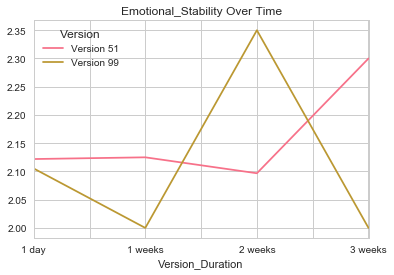

In [596]:
STATtest(df_99, df_51, 'Emotional_Stability')

In [457]:
#trial 51
logodds(71, 1, 48, 12)

log odds ratio = 2.8763855159214247


In [597]:
logodds(51,50,72,60)

log odds ratio = -0.1625189294977748


In [598]:
#improved
twoporZtest(51, 72, 101, 132)

z: -0.6137269147915507
p-value: 0.2696978998459714
CI: (-0.16982383266657147, 0.088815731856490554)
proportion difference: -0.04050405040504046
p1: 0.504950495049505
p2: 0.5454545454545454
Cohens H = 0.08113362616624409


In [599]:
#less good
twoporZtest(10, 7, 101, 132)

z: 1.3373326455476262
p-value: 0.09055703970736018
CI: (-0.023694945360822943, 0.1156541412804149)
proportion difference: 0.04597959795979598
p1: 0.09900990099009901
p2: 0.05303030303030303
Cohens H = 0.1754563096653966


In [600]:
#no effect
twoporZtest(40,53, 101, 132)

z: -0.08457610410435772
p-value: 0.4662991985735196
CI: (-0.13232707571037183, 0.12137598060086097)
proportion difference: -0.005475547554755433
p1: 0.39603960396039606
p2: 0.4015151515151515
Cohens H = 0.011182713406479694


## Euphoria Joy and Happiness 

--------------------Trial 99----------------------
Original Table
Euphoria_Joy_Happiness  Improved  Less good  No effect
Overall_Exp_Rating                                    
High                          48          1         42
Low                            0          4          6
--------------
Fitted Values
Euphoria_Joy_Happiness   Improved  Less good  No effect
Overall_Exp_Rating                                     
High                    43.581731   5.336538  43.581731
Low                      5.418269   0.663462   5.418269
--------------
Pearon Residuals
Euphoria_Joy_Happiness  Improved  Less good  No effect
Overall_Exp_Rating                                    
High                    0.745007  -1.660771  -0.163858
Low                    -2.112915   4.710117   0.464717
--------------
pvalue = 0.054438673608368265
statistic = 17.5
None
                                          
                                          
--------------------Trial 51----------------------
Origi

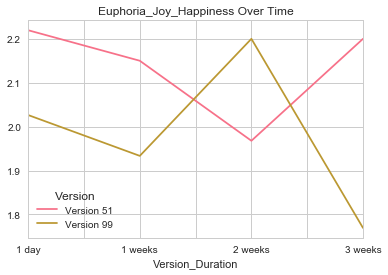

In [601]:
STATtest(df_99, df_51, 'Euphoria_Joy_Happiness')

In [462]:
#trial 51
logodds(71, 1, 48, 12)

log odds ratio = 2.8763855159214247


In [602]:
logodds(48,43,72,60)

log odds ratio = -0.07232066157962613


In [603]:
#improved
twoporZtest(48, 72, 101, 132)

z: -1.0626159048658297
p-value: 0.1439780856403311
CI: (-0.19944027636599024, 0.059026234961849861)
proportion difference: -0.07020702070207019
p1: 0.4752475247524752
p2: 0.5454545454545454
Cohens H = 0.14055997149310873


In [604]:
#less good
twoporZtest(5, 6, 101, 132)

z: 0.1444612066299303
p-value: 0.44256814384987475
CI: (-0.051198775584814948, 0.059299585665823051)
proportion difference: 0.0040504050405040515
p1: 0.04950495049504951
p2: 0.045454545454545456
Cohens H = 0.019050349164413116


In [605]:
#no effect
twoporZtest(48, 54, 101, 132)

z: 1.008702644567192
p-value: 0.15655863155495608
CI: (-0.06237681845500781, 0.19469004977814003)
proportion difference: 0.06615661566156611
p1: 0.4752475247524752
p2: 0.4090909090909091
Cohens H = 0.13330994353721515


## Finding the duration effect of the Nootropic for both trials

In [467]:
rating_4 = {'<2':1, '2-4': 2, '4-8':3, '8+':4}

In [468]:
def STATtest_two (df1, df2, col, rating):
    """automates finding the statistical tests but does not do cliffsdelta, cohensH, or twoproportion ztest"""
    table99 = pd.crosstab(index=df1.Overall_Exp_Rating, columns=df1[col])
    table51 = pd.crosstab(index=df2.Overall_Exp_Rating, columns=df2[col])
    
    print ('--------------------Trial 99----------------------')
    print (conttable(table99))
    print ('                                          ')
    print ('                                          ')

    print ('--------------------Trial 51----------------------')
    print (conttable(table51))
    
    
    df99 = df1[[col,'Overall_Exp_Rating', 'Version', 'Version_Duration']]
    df51 = df2[[col,'Overall_Exp_Rating', 'Version', 'Version_Duration']]
    df = pd.concat([df99, df51])
    tab = pd.crosstab(index=df[col], columns=df.Version, margins=True)
    print ('                                          ')
    print ('                                          ')
    print (tab)
    
    df['Rating'] = df[col].map(rating_4)
    
    t99 = df[df.Version=='Version 99']['Rating'].dropna()
    t51 = df[df.Version=='Version 51']['Rating'].dropna()
    
    print ('                                          ')
    print ('                                          ')
    
    print (manntest(t99,t51))
    
    mean_OT = pd.crosstab(index=df.Version_Duration, columns=df.Version, values=df.Rating, aggfunc=np.mean)
    mean_OT.plot()
    plt.title(str(col)+ ' ' + 'Over Time')
    print (stats.ttest_ind(t99, t51, equal_var=False))

--------------------Trial 99----------------------
Original Table
Estimated_Effect_Duration  2-4  4-8  8+  <2
Overall_Exp_Rating                         
High                        10   54  23   4
Low                          2    1   3   4
--------------
Fitted Values
Estimated_Effect_Duration        2-4        4-8         8+        <2
Overall_Exp_Rating                                                  
High                       10.811881  49.554455  23.425743  7.207921
Low                         1.188119   5.445545   2.574257  0.792079
--------------
Pearon Residuals
Estimated_Effect_Duration       2-4       4-8        8+        <2
Overall_Exp_Rating                                               
High                      -0.246912  0.631515 -0.087963 -1.194864
Low                        0.744839 -1.905041  0.265351  3.604453
--------------
pvalue = 0.010166222753988654
statistic = 19.0
None
                                          
                                          
----

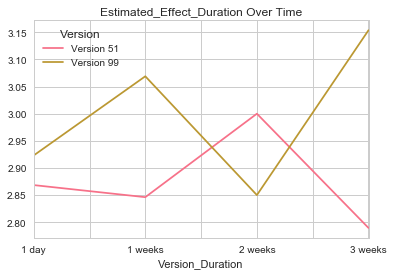

In [606]:
STATtest_two(df_99, df_51, 'Estimated_Effect_Duration', rating_4)

In [470]:
df_99.Upper_Effect_Duration.value_counts()

8.0     55
12.0    26
4.0     12
2.0      8
Name: Upper_Effect_Duration, dtype: int64

In [471]:
df_99.Estimated_Effect_Duration.value_counts()

4-8    55
8+     26
2-4    12
<2      8
Name: Estimated_Effect_Duration, dtype: int64

In [608]:
twoporZtest(12,16,101,124) #2-4

z: -0.2310029736365
p-value: 0.40865624593867383
CI: (-0.09661401683956744, 0.076173263086772802)
proportion difference: -0.010220376876397319
p1: 0.1188118811881188
p2: 0.12903225806451613
Cohens H = 0.03102463805389377


In [609]:
twoporZtest(55,62,101,124) #4-8

z: 0.6653484046867426
p-value: 0.2529138386864769
CI: (-0.086512579480816809, 0.175621490371906)
proportion difference: 0.044554455445544594
p1: 0.5445544554455446
p2: 0.5
Cohens H = 0.08922726096970823


In [610]:
twoporZtest(26,31,101,124) #8+

z: 0.12738274678217293
p-value: 0.4493187355334844
CI: (-0.1069406783572628, 0.12179216350577766)
proportion difference: 0.007425742574257432
p1: 0.25742574257425743
p2: 0.25
Cohens H = 0.0170657743644842


In [611]:
twoporZtest(8,15,101,124) #less than two

z: -1.0284467633050718
p-value: 0.15186986045057527
CI: (-0.11965979225549324, 0.036140149968683907)
proportion difference: -0.041759821143404666
p1: 0.07920792079207921
p2: 0.12096774193548387
Cohens H = 0.1398692396096659


In [472]:
df_99.Upper_Effect_Duration.median()

8.0

In [473]:
df_99.Lower_Effect_Duration.median()

4.0

In [474]:
df_51.Upper_Effect_Duration.median()

8.0

In [475]:
df_51.Lower_Effect_Duration.median()

4.0

## Current_User_Comparison

In [614]:
rating_5 = {'I am not a XNootropic user':0, 'This is less good than XNootropic':1,
           'This is less good than XNootropic':2, 'This is better than XNootropic':3}

In [476]:
CUC99 = df_99[['Current_User_Comparison','Overall_Exp_Rating', 'Version', 'Version_Duration']]
CUC51 = df_51[['Current_User_Comparison','Overall_Exp_Rating', 'Version', 'Version_Duration']]
CUC_df = pd.concat([CUC99, CUC51])
pd.crosstab(index=CUC_df['Current_User_Comparison'], columns=CUC_df.Version, margins=True)


Version,Version 51,Version 99,All
Current_User_Comparison,,,
I am not a XNootropic user,33,37,70
This is about the same as XNootropic,30,31,61
This is better than XNootropic,42,25,67
This is less good than XNootropic,24,7,31
All,129,100,229


In [477]:
twoporZtest(31, 30, 100, 129) #this is about the same

z: 1.3148276119505742
p-value: 0.0942839226731369
CI: (-0.038885848187334746, 0.19376956911756732)
proportion difference: 0.07744186046511628
p1: 0.31
p2: 0.23255813953488372


In [478]:
#this is better
twoporZtest(25, 42, 100, 129)

z: -1.2469027796773762
p-value: 0.10621657370311366
CI: (-0.19280768623251576, 0.041644895534841311)
proportion difference: -0.07558139534883723
p1: 0.25
p2: 0.32558139534883723


In [479]:
#this is less than good
twoporZtest(7,24, 100, 129) # only statistically significant 

z: -2.545840811990483
p-value: 0.005450744465765644
CI: (-0.19977547334715101, -0.032317549908662938)
proportion difference: -0.11604651162790697
p1: 0.07
p2: 0.18604651162790697


In [480]:
cohensH(0.07, 0.186046511628)

h = 0.356408652264551


In [612]:
5

5